In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score


In [149]:
df = pd.read_csv('/content/drive/MyDrive/ExcelR/Assignments/EastWestAirlines_CSV.csv',index_col=0)

In [150]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [151]:
df.shape

(3999, 11)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [153]:
df.isnull().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [154]:
df.duplicated().sum()

np.int64(1)

In [155]:
df.drop_duplicates(inplace=True)

In [156]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [157]:
df['Award?'].value_counts()

,count
Award?,
0,2517
1,1481


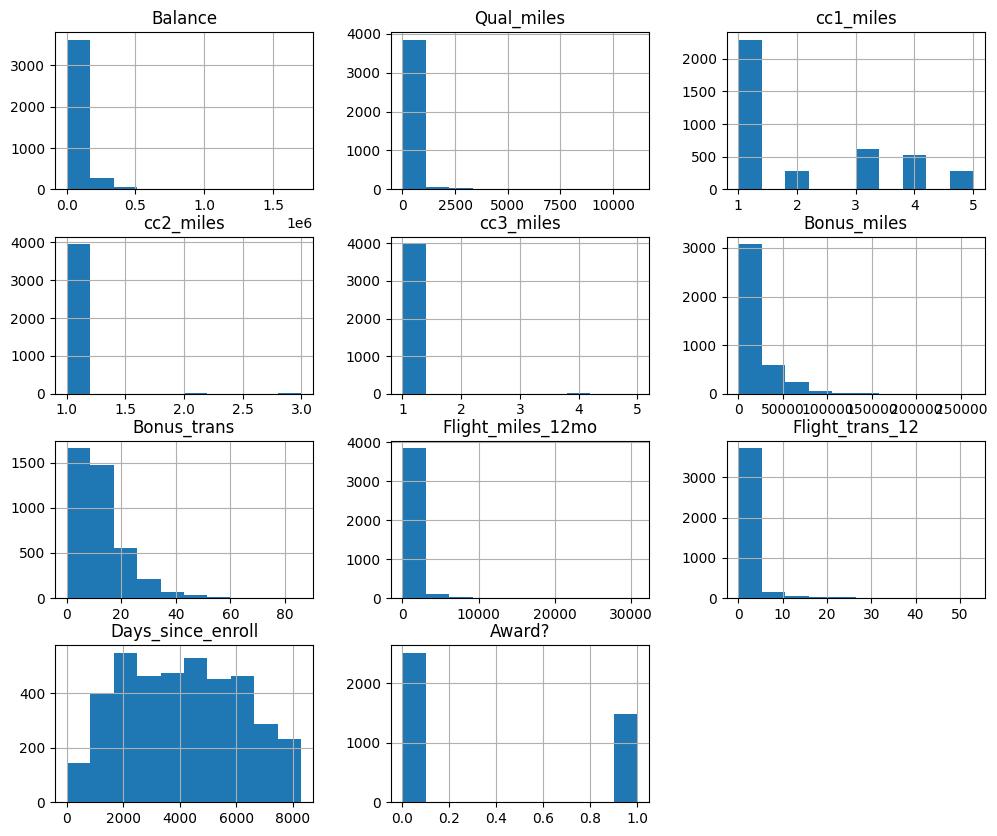

In [158]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,10))
plt.show()


## **Observations From Histogram**





* **Balance, Bonus_miles, Flight_miles_12mo** :- heavily right-skewed
* **Qual_miles, cc2_miles, cc3_miles** :- almost all values are zero
* **cc1_miles** :- looks categorical
* **Days_since_enroll** :- fairly uniform spread.

<Axes: >

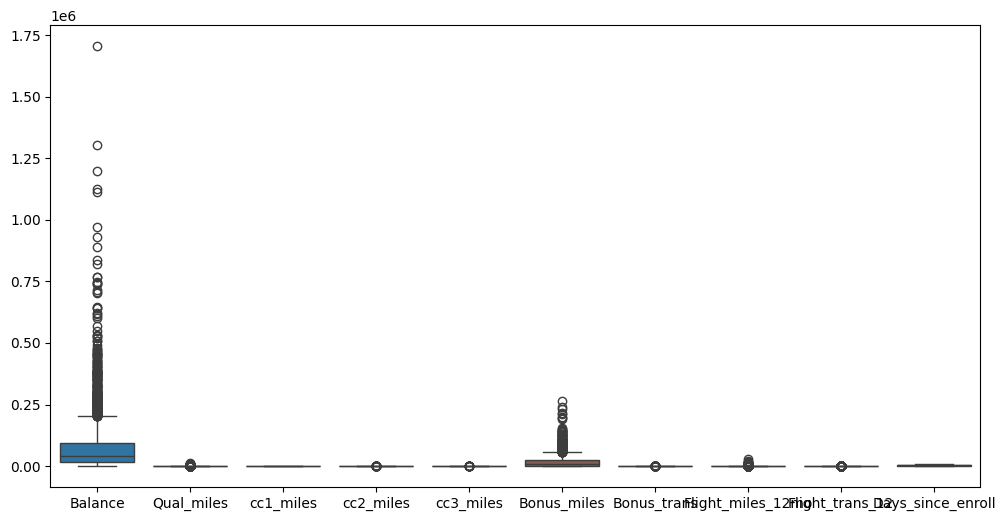

In [159]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=['Award?']))


In [160]:
def outliers(data):
  data_num = data.select_dtypes(include = 'number')

  for col in data_num:
      q1 = data[col].quantile(0.25)
      q3 = data[col].quantile(0.75)

      IQR = q3-q1
      lower_bound = q1 - 1.5*IQR
      upper_bound = q3 + 1.5*IQR

      data[col] = np.where(data[col] < lower_bound, lower_bound,
                      np.where(data[col] > upper_bound, upper_bound, data[col]))

  return data

In [161]:
df = outliers(df)

<Axes: >

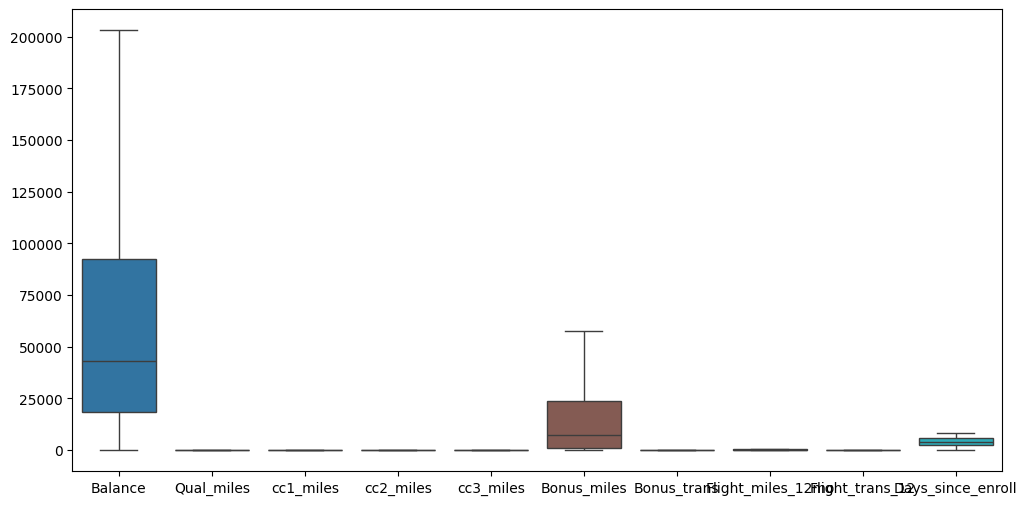

In [162]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=['Award?']))


<Axes: >

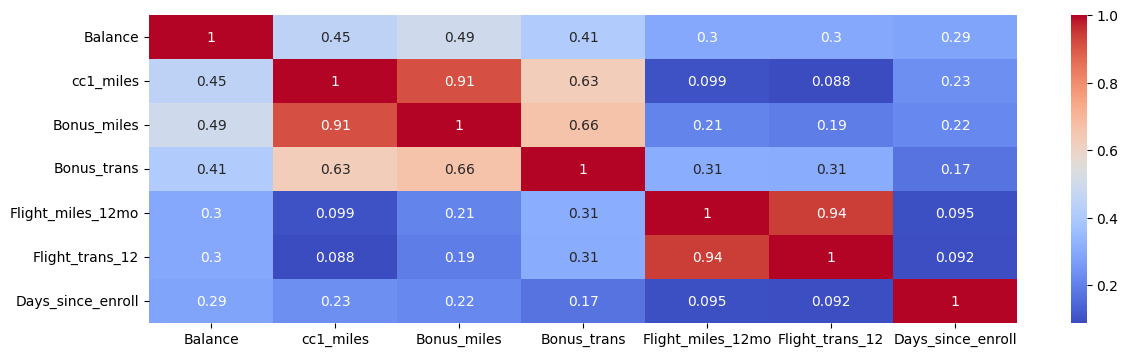

In [163]:
df_corr = df[['Balance', 'cc1_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll']]
plt.figure(figsize=(14,4))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")


In [164]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.00,0.0,7000.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.00,0.0,6968.0,0.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.00,0.0,7034.0,0.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.00,0.0,6952.0,0.0
5,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,783.75,2.5,6935.0,1.0


In [165]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[['Balance','Bonus_miles','Flight_miles_12mo','Days_since_enroll']] = encoder.fit_transform(df[['Balance','Bonus_miles','Flight_miles_12mo','Days_since_enroll']])

In [166]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,1395.0,0.0,1.0,1.0,1.0,30.0,1.0,0.0,0.0,2594.0,0.0
2,965.0,0.0,1.0,1.0,1.0,39.0,2.0,0.0,0.0,2587.0,0.0
3,1882.0,0.0,1.0,1.0,1.0,518.0,4.0,0.0,0.0,2604.0,0.0
4,724.0,0.0,1.0,1.0,1.0,96.0,1.0,0.0,0.0,2585.0,0.0
5,2988.0,0.0,4.0,1.0,1.0,2257.0,26.0,78.0,2.5,2581.0,1.0


In [167]:
df.shape

(3998, 11)

In [168]:
k_means =  KMeans(n_clusters=3,random_state=42)

In [169]:
k_means.fit(df)

KMeans(n_clusters=3, random_state=42)

In [170]:
labels = k_means.labels_

In [171]:
df['k_means_clusters'] = labels

In [172]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,k_means_clusters
ID#,,,,,,,,,,,,
1,1395.0,0.0,1.0,1.0,1.0,30.0,1.0,0.0,0.0,2594.0,0.0,1
2,965.0,0.0,1.0,1.0,1.0,39.0,2.0,0.0,0.0,2587.0,0.0,1
3,1882.0,0.0,1.0,1.0,1.0,518.0,4.0,0.0,0.0,2604.0,0.0,2
4,724.0,0.0,1.0,1.0,1.0,96.0,1.0,0.0,0.0,2585.0,0.0,1
5,2988.0,0.0,4.0,1.0,1.0,2257.0,26.0,78.0,2.5,2581.0,1.0,2


In [173]:
len(df[df['k_means_clusters'] == 0])

1053

In [174]:
len(df[df['k_means_clusters'] == 1])

1753

In [175]:
df['k_means_clusters'].value_counts()

,count
k_means_clusters,
1,1753
2,1192
0,1053


In [176]:
cluster_profile = df.groupby('k_means_clusters').mean()

In [177]:
cluster_profile

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_means_clusters,,,,,,,,,,,
0,2505.618234,0.0,2.129155,1.0,1.0,1160.182336,12.991453,21.509972,0.727445,914.759734,0.369421
1,850.851683,0.0,1.245864,1.0,1.0,416.468910,6.752424,9.454079,0.338848,1259.074729,0.259555
2,2963.664430,0.0,3.195470,1.0,1.0,1713.814597,17.075503,25.725671,0.843540,2167.099832,0.534396


In [178]:
silhouette_score(df,k_means.labels_)

np.float64(0.301471127896626)

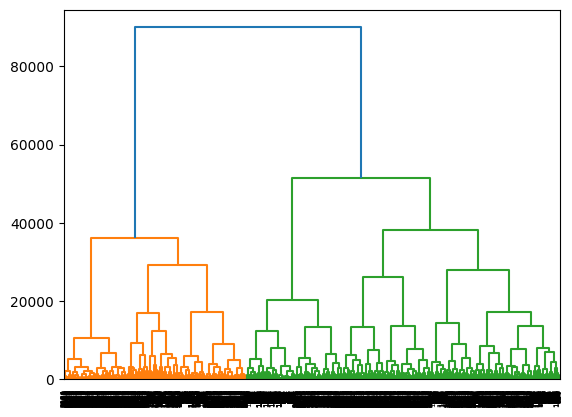

In [179]:
dendrogram = sch.dendrogram(sch.linkage(df,method='ward'))

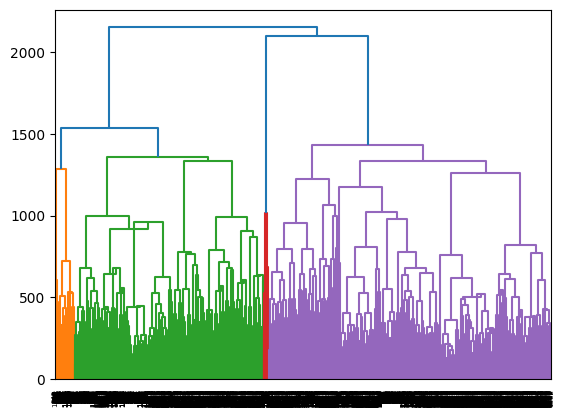

In [181]:
dendrogram = sch.dendrogram(sch.linkage(df,method='centroid'))

In [187]:
agg = AgglomerativeClustering(n_clusters=3,linkage='ward')
agg1 = agg.fit(df)

In [188]:
np.unique(agg1.labels_)

array([0, 1, 2])

In [189]:
silhouette_score(df,agg1.labels_)

np.float64(0.2443577447394063)

In [190]:
eps = np.arange(0.1,0.6,0.1)
min_samples = range(1,11)
min_samples

range(1, 11)

In [191]:

output = []

for i in eps:
    for j in min_samples:

        labels = DBSCAN(eps=i, min_samples=j).fit(df).labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            score = silhouette_score(df, labels)
            output.append([i, j, score])
        else:
            output.append([i, j, 'N/A (1 cluster found)'])

print(output)

ValueError: Number of labels is 3998. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
a = pd.DataFrame(output,columns=['eps','min_samples','score'])

a['score'] = pd.to_numeric(a['score'], errors='coerce')

max_score = a['score'].max()

best_params = a[a['score'] == max_score]

print(f"Maximum Silhouette Score found: {max_score:.4f}")
print("Best parameters:")
print(best_params)

In [ ]:
a

In [ ]:
a[a['score']==max_score]

In [192]:
labels = DBSCAN(eps = 0.2,min_samples=8).fit(df).labels_

In [193]:
np.unique(labels)

array([-1])